## Part. 2 How to improve the classification model? Principal component analysis (PCA)

In this case, the method did not improve the model. However, there are models in which the PCA method is a very important reason for improving the properties of the model.
Loads data from the Titanic database.

In [1]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/kaggletrain.csv')
df = df.dropna(how='any')
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [2]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Digitizing data in page format

In [4]:
df['Sex'] = pd.Categorical(df.Sex).codes
df['Ticket'] = pd.Categorical(df.Ticket).codes
df['Cabin'] = pd.Categorical(df.Ticket).codes
df['Embarked'] = pd.Categorical(df.Embarked).codes

### Selection of variables divided into test and training set

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split  

X = df[[ 'Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

### Data normalization (standardization)

PCA works best with a standardized feature set. We will perform standard scalar normalization to normalize our feature set.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

### Principal component analysis (PCA)

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

We did not provide the number of components in the constructor. Therefore, all 9 variables from the set will be returned for both the training and test set.

The PCA class contains, explained_variance_ratio_which returns the variance called by each variable.

In [8]:
explained_variance = pca.explained_variance_ratio_

In [9]:
SOK = np.round(explained_variance, decimals=2)
SOK

array([0.25, 0.18, 0.18, 0.11, 0.1 , 0.07, 0.06, 0.04, 0.  ])

In [10]:
KOT = dict(zip(X, SOK))

KOT_sorted_keys = sorted(KOT, key=KOT.get, reverse=True)

for r in KOT_sorted_keys:
    print (r, KOT[r])

    KOT

Pclass 0.25
Sex 0.18
Age 0.18
SibSp 0.11
Parch 0.1
Ticket 0.07
Fare 0.06
Cabin 0.04
Embarked 0.0


## We're looking for one, the best independent variable in the model

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF4 = RandomForestClassifier(max_depth=2, random_state=0)
RF4.fit(Xtrain, ytrain)

# Predicting the Test set results
y_pred1 = RF4.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
# model assessment
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain, RF4.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, RF4.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, RF4.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, RF4.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, RF4.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, RF4.predict(Xtest)))
y_pred_proba = RF4.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred1)
auc = metrics.roc_auc_score(ytest, y_pred1)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

Recall Training data:      0.9877
Precision Training data:   0.6504
----------------------------------------------------------------------
Recall Test data:          0.9524
Precision Test data:       0.7692
----------------------------------------------------------------------
Confusion Matrix Test data
[[ 1 12]
 [ 2 40]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.33      0.08      0.12        13
           1       0.77      0.95      0.85        42

    accuracy                           0.75        55
   macro avg       0.55      0.51      0.49        55
weighted avg       0.67      0.75      0.68        55



<Figure size 640x480 with 1 Axes>

auc 0.5146520146520146


## We're looking for the two best independent variables in the model

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split  

X = df[[ 'Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

#### PCA algorithm

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [17]:
from sklearn.ensemble import RandomForestClassifier

RF2 = RandomForestClassifier(max_depth=2, random_state=0)
RF2.fit(Xtrain, ytrain)

# Predicting the Test set results
y_pred2 = RF2.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Recall Training data:      0.9383
Precision Training data:   0.6972
----------------------------------------------------------------------
Recall Test data:          0.9524
Precision Test data:       0.8
----------------------------------------------------------------------
Confusion Matrix Test data
[[ 3 10]
 [ 2 40]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.80      0.95      0.87        42

    accuracy                           0.78        55
   macro avg       0.70      0.59      0.60        55
weighted avg       0.75      0.78      0.74        55



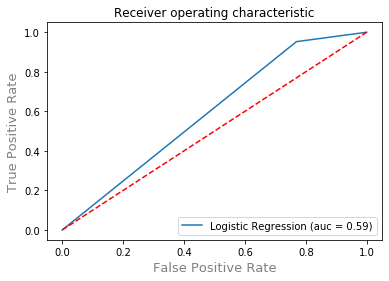

auc 0.5915750915750915


In [18]:
# ocena modelu
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain, RF2.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, RF2.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, RF2.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, RF2.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, RF2.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, RF2.predict(Xtest)))
y_pred_proba = RF2.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred2)
auc = metrics.roc_auc_score(ytest, y_pred2)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

## We are looking for the three best independent variables in the model

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split  

X = df[[ 'Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [21]:
#### Algorytm PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF3 = RandomForestClassifier(max_depth=2, random_state=0)
RF3.fit(Xtrain, ytrain)

# Predicting the Test set results
y_pred = RF3.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Recall Training data:      0.9136
Precision Training data:   0.7115
----------------------------------------------------------------------
Recall Test data:          0.9048
Precision Test data:       0.8444
----------------------------------------------------------------------
Confusion Matrix Test data
[[ 6  7]
 [ 4 38]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        13
           1       0.84      0.90      0.87        42

    accuracy                           0.80        55
   macro avg       0.72      0.68      0.70        55
weighted avg       0.79      0.80      0.79        55



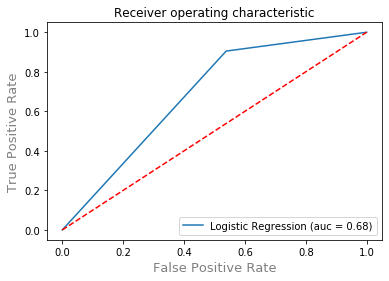

auc 0.6831501831501832


In [24]:
# ocena modelu
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain, RF3.predict(Xtrain)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain, RF3.predict(Xtrain)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, RF3.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, RF3.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, RF3.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, RF3.predict(Xtest)))
y_pred_proba = RF3.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
auc = metrics.roc_auc_score(ytest, y_pred)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(Xtrain)

In [26]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')